In [12]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [13]:
import numpy as np
import pandas as pd

In [14]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [15]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [16]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [17]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [18]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [19]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [20]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# check the  the columns of the tables
first_row = session.query(Measurement).first() 
first_row.__dict__  


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x265e060ed68>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [11]:
# check the  the columns of the tables
first_row = session.query(Station).first() 
first_row.__dict__  

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x265e0653a90>,
 'elevation': 3.0,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [12]:
inspector = inspect(engine)
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])  


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])  

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [82]:

Measurement = Base.classes.measurement
Station = Base.classes.station
# last date 
#session.query(Measurement.date).order_by(Measurement.date.desc()).first()

#prior_one_year_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
#prior_one_year_date 

#last_12_month_date= session.query(Measurement.date, Measurement.prcp).filter(Measurement.date < '2017-08-24')\
#    .filter(Measurement.date > '2016-8-22')\
#    .order_by(Measurement.date.desc()).all()

# sql = "select date, sum(prcp) from Measurement where date > '2016-8-22' and date < '2017-08-24' group by date \
#       order by date desc"  this return 235, it does not sound right, if condition year 2106 returns 366
sql = "select date, sum(prcp) from Measurement where date > '2016-08-23' group by date order by date desc"

#sql = "select date, sum(prcp) from Measurement where date > '2016-8-22' and date < '2017-08-24' group by date \
#       order by date desc"
result = engine.execute(sql)
i = 0
for res in result:
    i += 1
print(i)

365


In [61]:


result3 = engine.execute('select date, prcp from Measurement where substr(date,1, 7) in \
(select substr(date, 1, 7) as sel_date from Measurement group by sel_date order by sel_date desc')

for res in result3:
    print(f'date - {res[0]} : prcp - {res[1]}')


date - 2016-09-01 : prcp - 0.0
date - 2016-09-02 : prcp - 0.0
date - 2016-09-03 : prcp - 0.0
date - 2016-09-04 : prcp - 0.03
date - 2016-09-05 : prcp - None
date - 2016-09-06 : prcp - None
date - 2016-09-07 : prcp - 0.05
date - 2016-09-08 : prcp - 0.0
date - 2016-09-09 : prcp - 0.03
date - 2016-09-10 : prcp - 0.0
date - 2016-09-11 : prcp - 0.05
date - 2016-09-12 : prcp - 0.0
date - 2016-09-13 : prcp - 0.02
date - 2016-09-14 : prcp - 1.32
date - 2016-09-15 : prcp - 0.42
date - 2016-09-16 : prcp - 0.06
date - 2016-09-17 : prcp - 0.05
date - 2016-09-18 : prcp - 0.0
date - 2016-09-19 : prcp - 0.0
date - 2016-09-20 : prcp - 0.0


In [14]:
conn = engine.connect()

measure_date = [res[0] for res in result]
prcp = [res[1] for res in result]
dict = {'date': measure_date, 'Precipitation': prcp}

data = pd.DataFrame(dict)


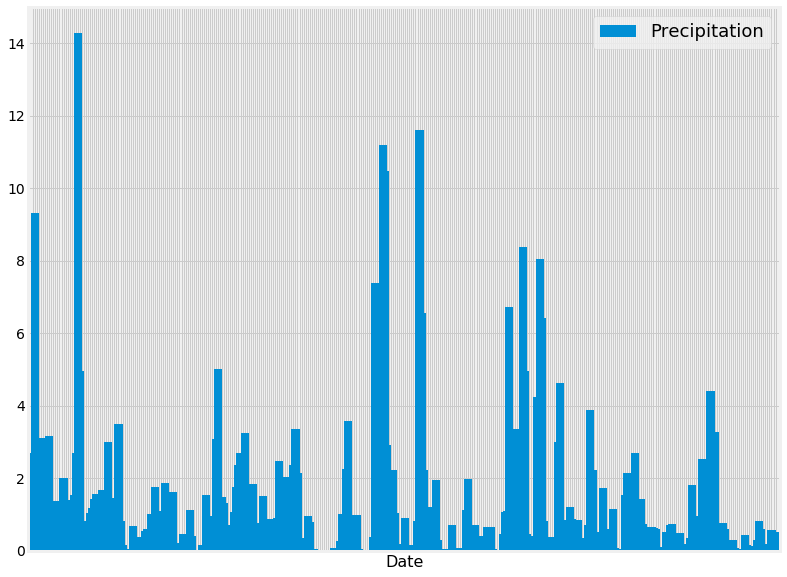

In [61]:
# prcp of the last 12 months
# Q1. Do we plot the date, prcp group by date which returns 366 records?
result = session.query(Measurement.date, func.sum(Measurement.prcp))\
        .filter(Measurement.date >= '2016-08-23').filter(Measurement.date <= '2017-08-23')\
        .group_by(Measurement.date).all()

measure_date = [res[0] for res in result]
prcp = [res[1] for res in result]
dict = {'date': measure_date, 'Precipitation': prcp}

data = pd.DataFrame(dict)

data =data.sort_values('date').set_index('date')

ax = data.plot(kind='bar', width=4.0, figsize=(12,10))

plt.setp(ax.get_xticklabels(), visible=False)
ax.set_yticklabels([0,2,4,6,8,10,12,14], fontsize = '14')
ax.set_xlabel('Date', fontsize = '16')

plt.legend(fontsize = '18')
plt.show()

In [147]:
# Calculate the date 1 year ago from the last data point in the database
# last date 
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
lastyear = np.int(last_date[0][:4])
lastmonth = np.int(last_date[0][5:7])
lastday = np.int(last_date[0][8:10])
dateOneYearFromLastDate = dt.date(lastyear, lastmonth,  lastday) - dt.timedelta(days=366)
dateOneYearFromLastDate

datetime.date(2016, 8, 22)

In [1]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


![precipitation](Images/precipitation.png)

In [67]:
result_p = session.query(Measurement.prcp).\
        filter(Measurement.date >= '2016-08-23').all()

prcp = list(np.ravel(result_p))
dict_p = {'Precipitation': prcp}
prcp_df = pd.DataFrame(dict_p)
prcp_df.describe()
                       

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

![describe](Images/describe.png)

In [77]:
# Design a query to show how many stations are available in this dataset?
Station = Base.classes.station

session.query(func.count(Station.id)).all()

[(9)]

In [69]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Station.station, func.count(Measurement.station))\
.filter(Station.station == Measurement.station)\
.group_by(Station.station).order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [71]:
session.query(Station.id, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
.filter(Station.station == Measurement.station)\
.group_by(Station.id).order_by(Station.id).all()
# We are to give result of the above 9 stations?

[(1, 56.0, 87.0, 74.55323054331865),
 (2, 59.0, 85.0, 72.68918420081211),
 (3, 58.0, 85.0, 74.8732970027248),
 (4, 58.0, 87.0, 74.68440233236151),
 (5, 58.0, 83.0, 72.72407045009784),
 (6, 56.0, 85.0, 74.5436493068565),
 (7, 54.0, 85.0, 71.66378066378067),
 (8, 53.0, 87.0, 71.61596766043456),
 (9, 58.0, 84.0, 70.91500765696784)]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


[(54.0, 85.0, 71.66378066378067)]

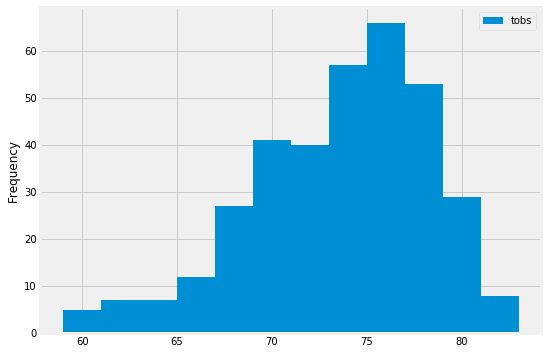

In [98]:

result = session.query(Measurement.tobs).filter(Station.station == Measurement.station)\
            .filter(Measurement.date >= '2016-08-23').filter(Station.id == 7).all()
tobs = list(np.ravel(result))
data_hist = pd.DataFrame({'tobs':tobs})

#data_hist = pd.read_sql(sql, conn)
axe = data_hist.plot(kind='hist', bins=12, figsize=(8,6))
#axe = data_hist.hist()
#axe.xlim(50, 90)
plt.legend()

In [1]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [82]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [207]:
print(calc_temps('2017-02-26', '2017-03-16'))

[(62.0, 70.89915966386555, 82.0)]


In [83]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2017-02-26', '2017-03-13'))

[(62.0, 70.68686868686869, 82.0)]


Text(0,0.5,'Temp (F)')

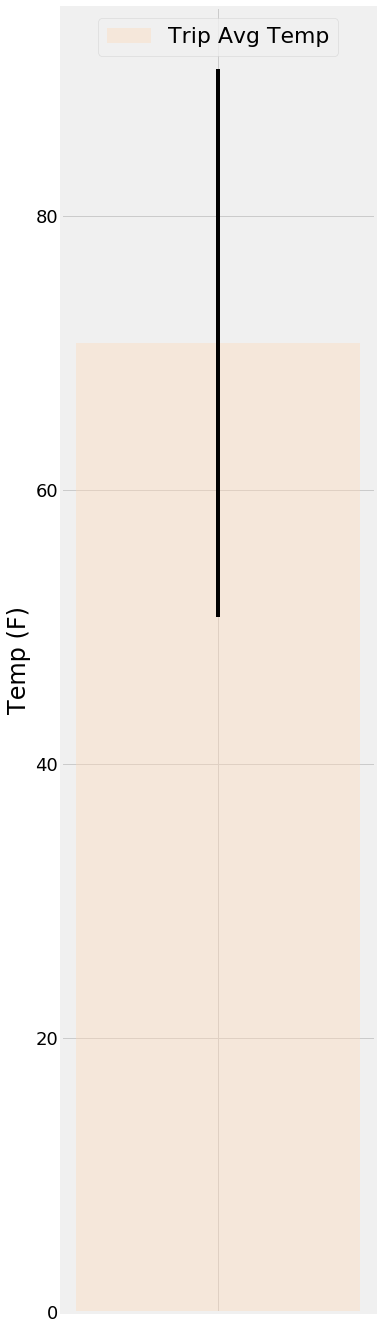

In [99]:
results = session.query(func.avg(Measurement.tobs)).\
        filter(Measurement.date >= '2017-02-26').filter(Measurement.date <= '2017-03-13')\
        .group_by(Measurement.date).all()

avg_temp = list(np.ravel(results))
df = pd.DataFrame(avg_temp)
df = df.rename(columns={0: 'Temp'})

fig, axe = plt.subplots(nrows = 1, ncols = 1, figsize=(5, 24) )
plt.bar(x='', height=70.68686868686869,  width=0.4, yerr=(82.0 - 62.0), label='Trip Avg Temp', color='peachpuff', alpha = 0.4)
plt.legend(loc=9, fontsize='22') 


#axe.ylim = (0,160)
axe.set_yticklabels([0,20,40,60,80, 100, 120, 140], fontsize = '18')
axe.set_ylabel('Temp (F)', fontsize = '24')


<IPython.core.display.Javascript object>


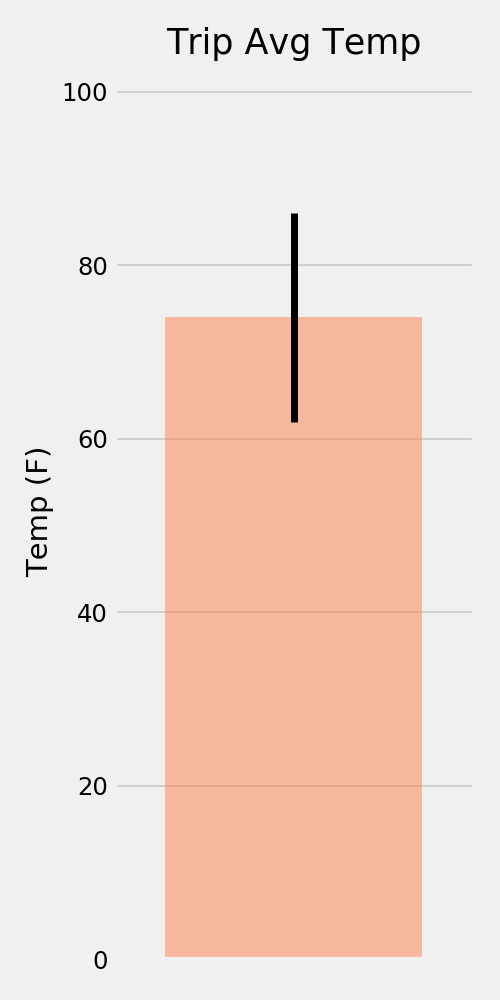

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.barplot()

In [272]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
session.query(Station.station,  Station.name, Station.latitude, Station.longitude, \
              Station.elevation, func.sum(Measurement.prcp)).filter(Station.station == Measurement.station)\
            .filter(Measurement.date >= '2016-02-26').filter(Measurement.date <= '2016-03-13')\
            .group_by(Station.station, Station.name,Station.latitude, Station.longitude, Station.elevation)\
            .order_by(func.sum(Measurement.prcp).desc()).all()


[('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  0.7100000000000001),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.71),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.69),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.65),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  0.51),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.19),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None)]

In [19]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


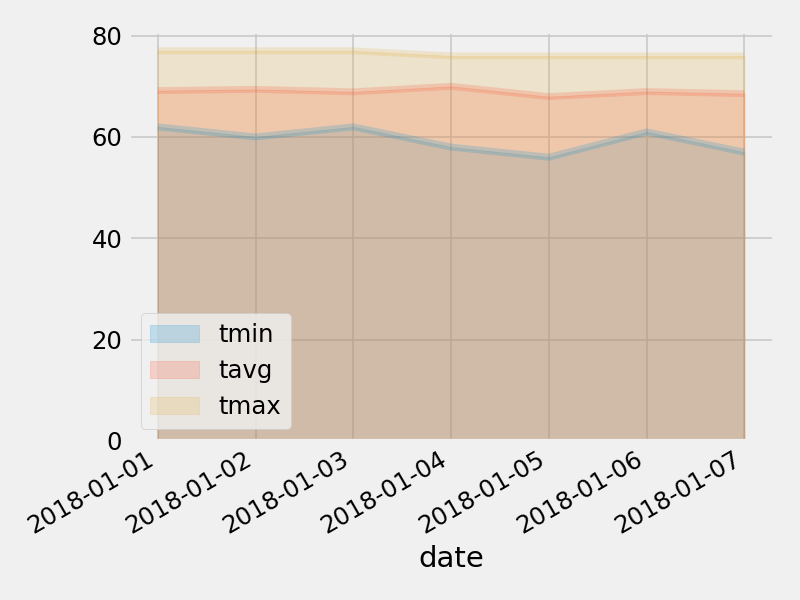

In [23]:
# Plot the daily normals as an area plot with `stacked=False`


In [104]:
result_f= session.query(Measurement.date, Measurement.tobs).all()

date_f = [res[0] for res in result_f]
tobs_f = [res[1] for res in result_f]

date_tobs = []
for res in result_f:
    date_tobs_dict = {}
    date_tobs_dict["date"] = res[0]
    date_tobs_dict["tobs"] = res[1]
        
    date_tobs.append(date_tobs_dict)


[{'date': '2010-01-01', 'tobs': 65.0},
 {'date': '2010-01-02', 'tobs': 63.0},
 {'date': '2010-01-03', 'tobs': 74.0},
 {'date': '2010-01-04', 'tobs': 76.0},
 {'date': '2010-01-06', 'tobs': 73.0}]

In [22]:
result= session.query(Station.station).all()
stations = list(np.ravel(result))
stations
  
  

['USC00519397',
 'USC00513117',
 'USC00514830',
 'USC00517948',
 'USC00518838',
 'USC00519523',
 'USC00519281',
 'USC00511918',
 'USC00516128']

In [25]:
result = session.query(Measurement.tobs)\
            .filter(Measurement.date >= '2016-08-23')\
            .group_by(Measurement.date)\
            .order_by(Measurement.date.desc()).all()
tobs = list(np.ravel(result))
len(tobs)

366

In [20]:

result = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
    .filter(Measurement.date >= '2016-08-23')\
    .group_by(Measurement.date).order_by(Measurement.date.desc()).all()

all_list = [list(res) for res in result]
all_list

[[76.0, 82.0, 80.25],
 [76.0, 82.0, 80.0],
 [76.0, 82.0, 79.5],
 [78.0, 81.0, 79.66666666666667],
 [71.0, 85.0, 78.75],
 [76.0, 80.0, 78.0],
 [72.0, 83.0, 77.25],
 [71.0, 82.0, 77.0],
 [70.0, 82.0, 77.2],
 [75.0, 81.0, 78.2],
 [77.0, 84.0, 80.6],
 [74.0, 83.0, 79.0],
 [72.0, 81.0, 78.0],
 [75.0, 81.0, 79.25],
 [71.0, 81.0, 77.33333333333333],
 [74.0, 82.0, 78.5],
 [78.0, 83.0, 80.5],
 [79.0, 83.0, 81.4],
 [77.0, 82.0, 80.0],
 [77.0, 82.0, 80.0],
 [76.0, 81.0, 79.0],
 [73.0, 83.0, 79.0],
 [72.0, 77.0, 74.5],
 [74.0, 82.0, 78.71428571428571],
 [78.0, 84.0, 80.6],
 [77.0, 83.0, 80.5],
 [73.0, 81.0, 79.14285714285714],
 [75.0, 80.0, 78.0],
 [73.0, 84.0, 78.42857142857143],
 [77.0, 81.0, 79.28571428571429],
 [75.0, 79.0, 77.66666666666667],
 [75.0, 82.0, 79.6],
 [72.0, 81.0, 77.66666666666667],
 [72.0, 81.0, 78.14285714285714],
 [75.0, 80.0, 78.42857142857143],
 [74.0, 81.0, 78.16666666666667],
 [76.0, 83.0, 79.14285714285714],
 [72.0, 82.0, 77.83333333333333],
 [75.0, 82.0, 78.333333333333

In [22]:
test = dt.date(2016,3, 23)

In [23]:
dt.isdate(test)

AttributeError: module 'datetime' has no attribute 'isdate'